In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
syp.interactive.printing.init_printing(use_latex= True)

In [2]:
# constructing the symbols
x = syp.Symbol("x")
sig = syp.Symbol("\sigma")
y = syp.Symbol("y")
r = syp.Symbol("r")
z = syp.Symbol("z")
b = syp.Symbol("b")

In [5]:
# constucting the coupled ODEs
def dx(sig, y, x):
    return (sig) * (y-x)

def dy(r, x, y, z):
    return (r * x) - (y) - (x * z)

def dz(x, y, b, z):
    return (x * y) - (b * z)

In [20]:
# symbolically is taking toooo much time (i hade to interrupt it at 15 min and only for 10 points)
N = 10
t = syp.zeros(1,N)
x = syp.zeros(1,N)
y = syp.zeros(1,N)
z = syp.zeros(1,N)
t[0] = 0
x[0] = 1
y[0] = 1
z[0] = 1
h = 0.01
for i in range(1, len(t)):
    kx1 = h * sig * (y[i-1]-x[i-1])
    kx2 = h * sig * ((y[i-1] + (kx1/2)) - (x[i-1] + (kx1/2)))
    kx3 = h * sig * ((y[i-1] + (kx2/2)) - (x[i-1] + (kx2/2)))
    kx4 = h * sig * ((y[i-1] + (kx3)) - (x[i-1] + (kx3)))
    x[i] = x[i-1] + (1/6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

    ky1 = h * (r * x[i-1] - y[i-1] - x[i-1] * z[i-1])
    ky2 = h * (r * (x[i-1] + (ky1/2)) - (y[i-1] + (ky1/2)) - ((x[i-1] + (ky1/2)) * (z[i-1] + (ky1/2))))
    ky3 = h * (r * (x[i-1] + (ky2/2)) - (y[i-1] + (ky2/2)) - ((x[i-1] + (ky2/2)) * (z[i-1] + (ky2/2))))
    ky4 = h * (r * (x[i-1] + (ky3)) - (y[i-1] + (ky3)) - ((x[i-1] + (ky3)) * (z[i-1] + (ky3))))
    y[i] = y[i-1] + (1/6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

    kz1 = h * (x[i-1] * y[i-1] - b * z[i-1])
    kz2 = h * ((x[i-1] + (kz1/2))*(y[i-1]+ (kz1/2)) - b * (z[i-1] + (kz1/2)))
    kz3 = h * ((x[i-1] + (kz2/2))*(y[i-1]+ (kz2/2)) - b * (z[i-1] + (kz2/2)))
    kz4 = h * ((x[i-1] + (kz3))*(y[i-1]+ (kz3)) - b * (z[i-1] + (kz3)))
    z[i] = z[i-1] + (1/6) * (kz1 + 2 * kz2 + 2 * kz3 + ky4)
    
    t[i] = t[i-1] + h
display(t, x, y, z)

In [4]:

# N = 100000
# t = np.zeros(N)
# x = np.zeros(N)
# y = np.zeros(N)
# z = np.zeros(N)
# t[0] = 0
# x[0] = 0.1
# y[0] = 0.1
# z[0] = 0.1
# h = 0.01
# sig = 10
# r = 28
# b = 8/3
# for i in range(1, len(t)):
#     kx1 = h * sig * (y[i-1]-x[i-1])
#     kx2 = h * sig * ((y[i-1] + (kx1/2)) - (x[i-1] + (kx1/2)))
#     kx3 = h * sig * ((y[i-1] + (kx2/2)) - (x[i-1] + (kx2/2)))
#     kx4 = h * sig * ((y[i-1] + (kx3)) - (x[i-1] + (kx3)))
#     x[i] = x[i-1] + (1/6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

#     ky1 = h * (r * x[i-1] - y[i-1] - x[i-1] * z[i-1])
#     ky2 = h * (r * (x[i-1] + (ky1/2)) - (y[i-1] + (ky1/2)) - ((x[i-1] + (ky1/2)) * (z[i-1] + (ky1/2))))
#     ky3 = h * (r * (x[i-1] + (ky2/2)) - (y[i-1] + (ky2/2)) - ((x[i-1] + (ky2/2)) * (z[i-1] + (ky2/2))))
#     ky4 = h * (r * (x[i-1] + (ky3)) - (y[i-1] + (ky3)) - ((x[i-1] + (ky3)) * (z[i-1] + (ky3))))
#     y[i] = y[i-1] + (1/6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

#     kz1 = h * (x[i-1] * y[i-1] - b * z[i-1])
#     kz2 = h * ((x[i-1] + (kz1/2))*(y[i-1]+ (kz1/2)) - b * (z[i-1] + (kz1/2)))
#     kz3 = h * ((x[i-1] + (kz2/2))*(y[i-1]+ (kz2/2)) - b * (z[i-1] + (kz2/2)))
#     kz4 = h * ((x[i-1] + (kz3))*(y[i-1]+ (kz3)) - b * (z[i-1] + (kz3)))
#     z[i] = z[i-1] + (1/6) * (kz1 + 2 * kz2 + 2 * kz3 + ky4)
    
#     t[i] = t[i-1] + h
# plt.plot(t, x, 'k')
# plt.title("x(t)")
# plt.show()
# plt.plot(t, y, 'k')
# plt.title("y(t)")
# plt.show()
# plt.plot(t, z, 'k')
# plt.title("z(t)")
# plt.show()
# plt.figure(figsize= (10, 10))
# plt.plot(x, z, 'k')
# plt.show()

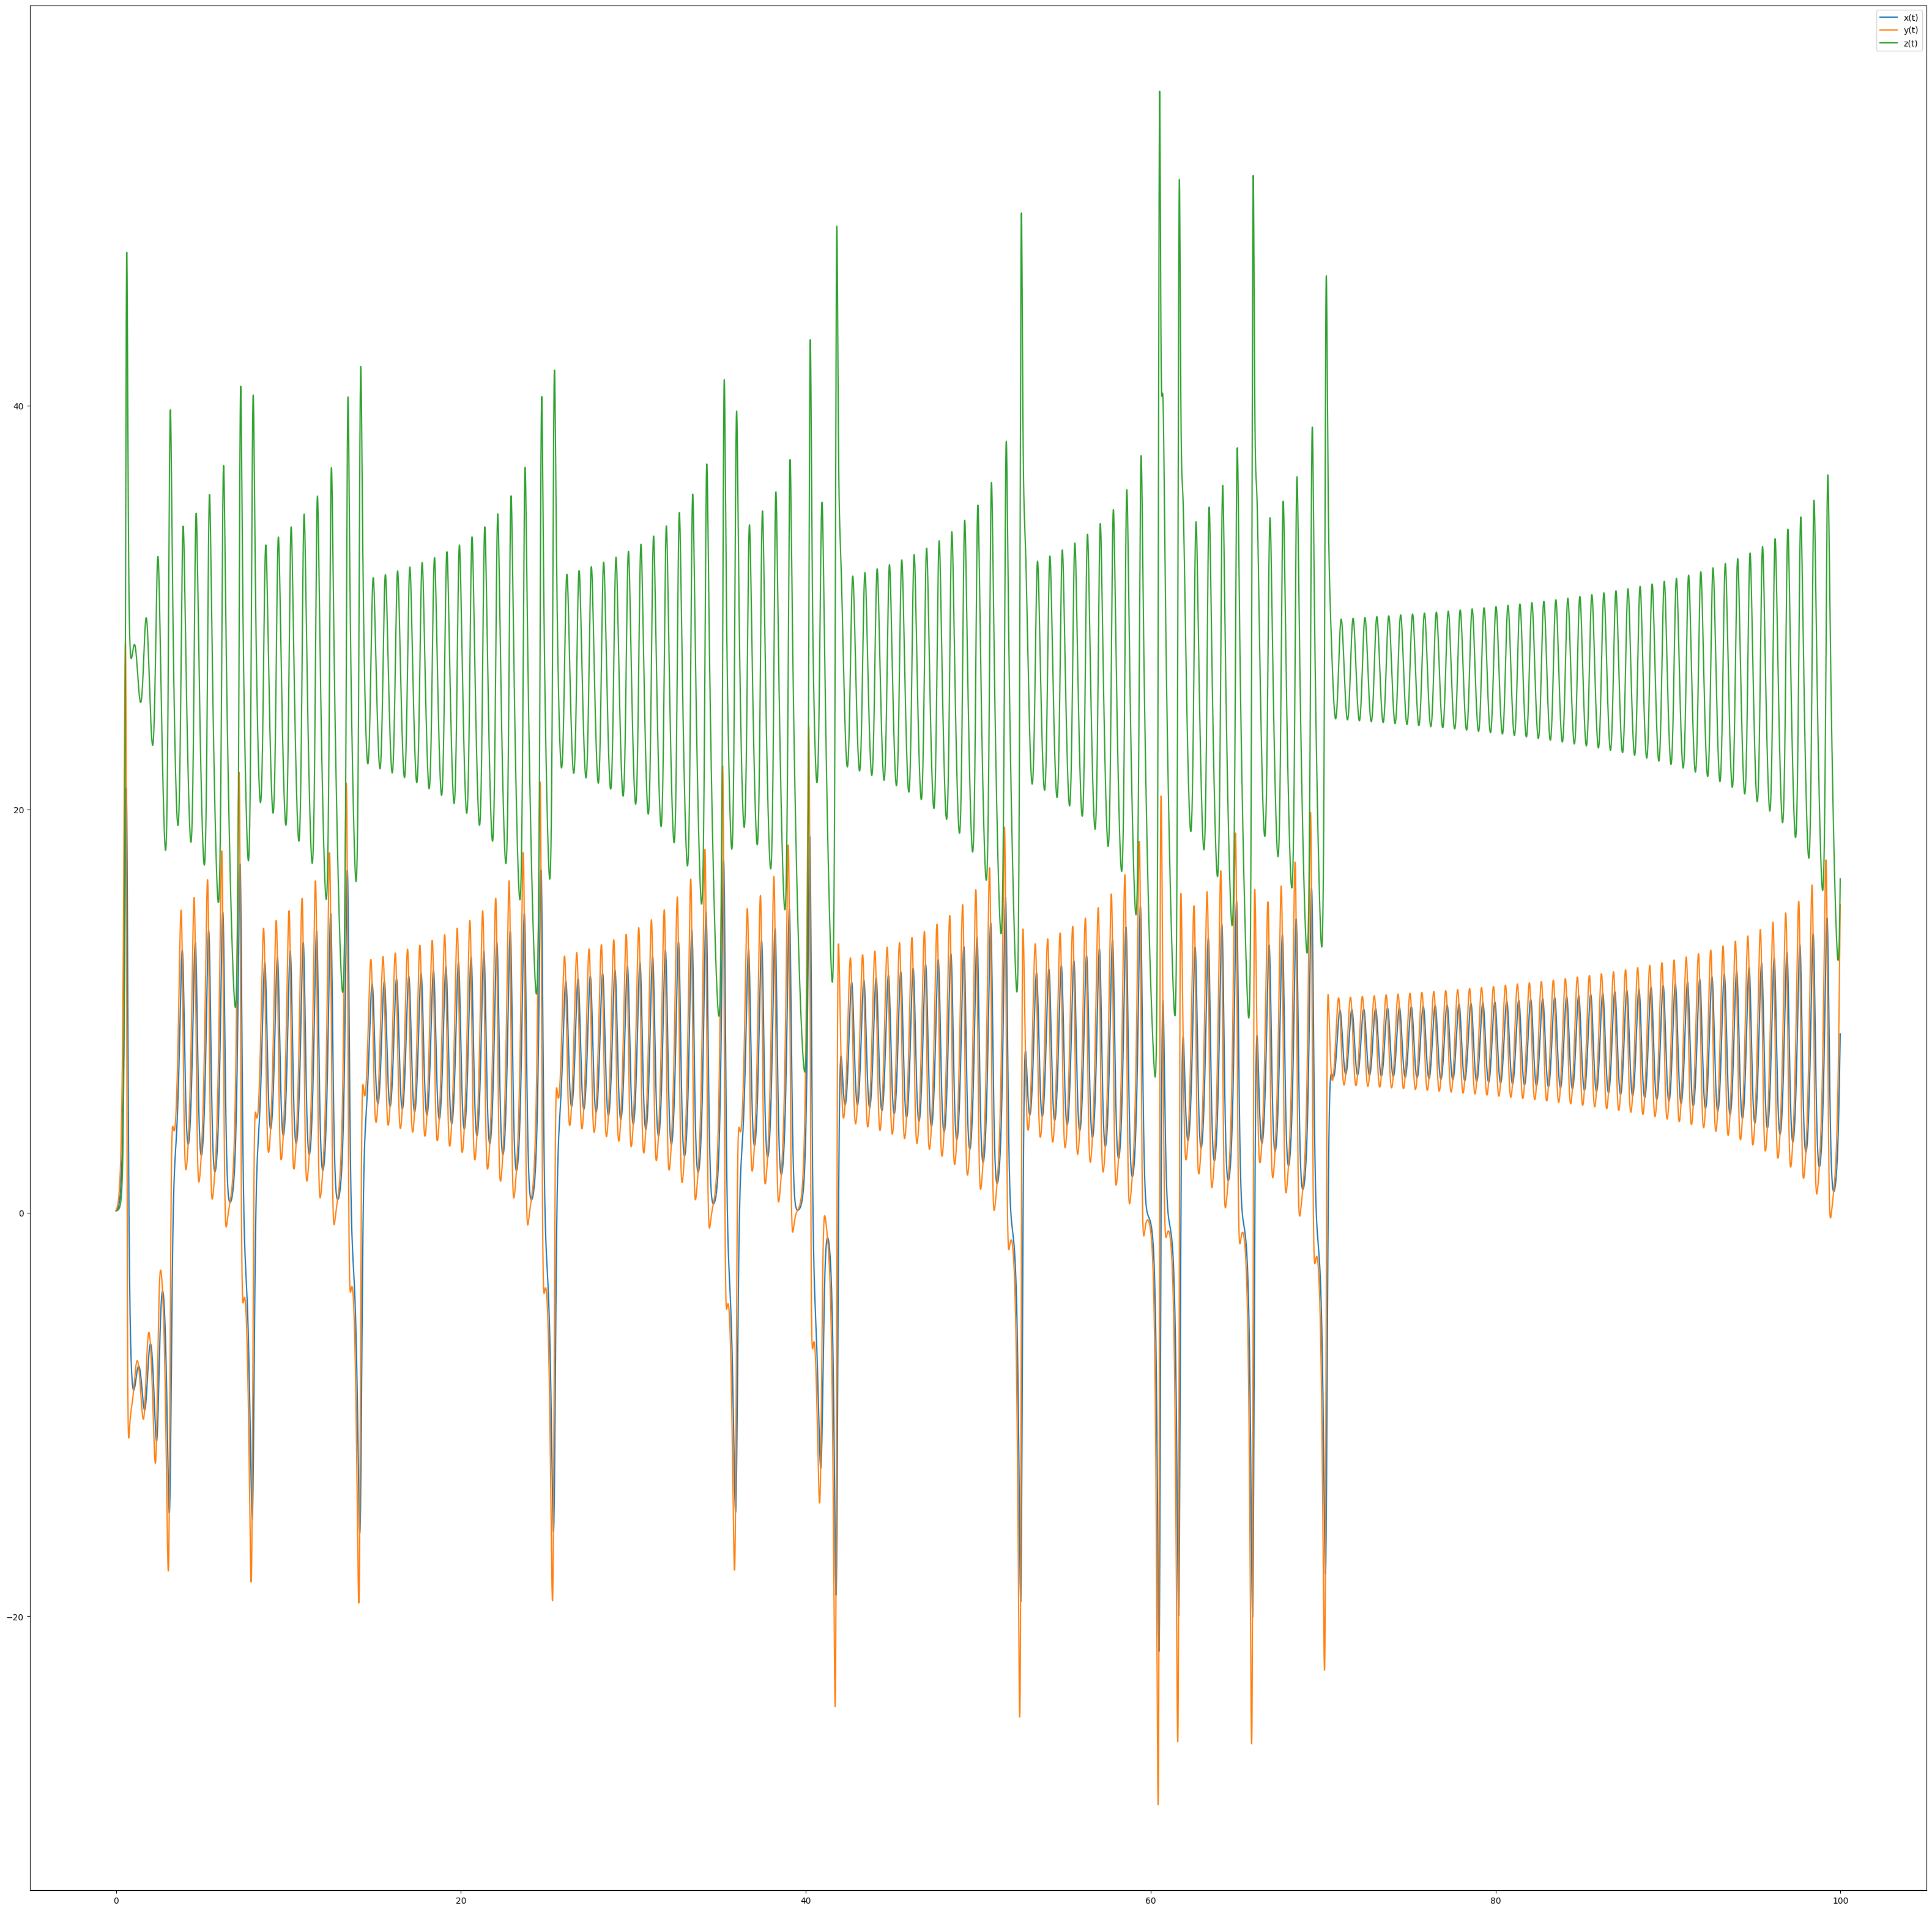

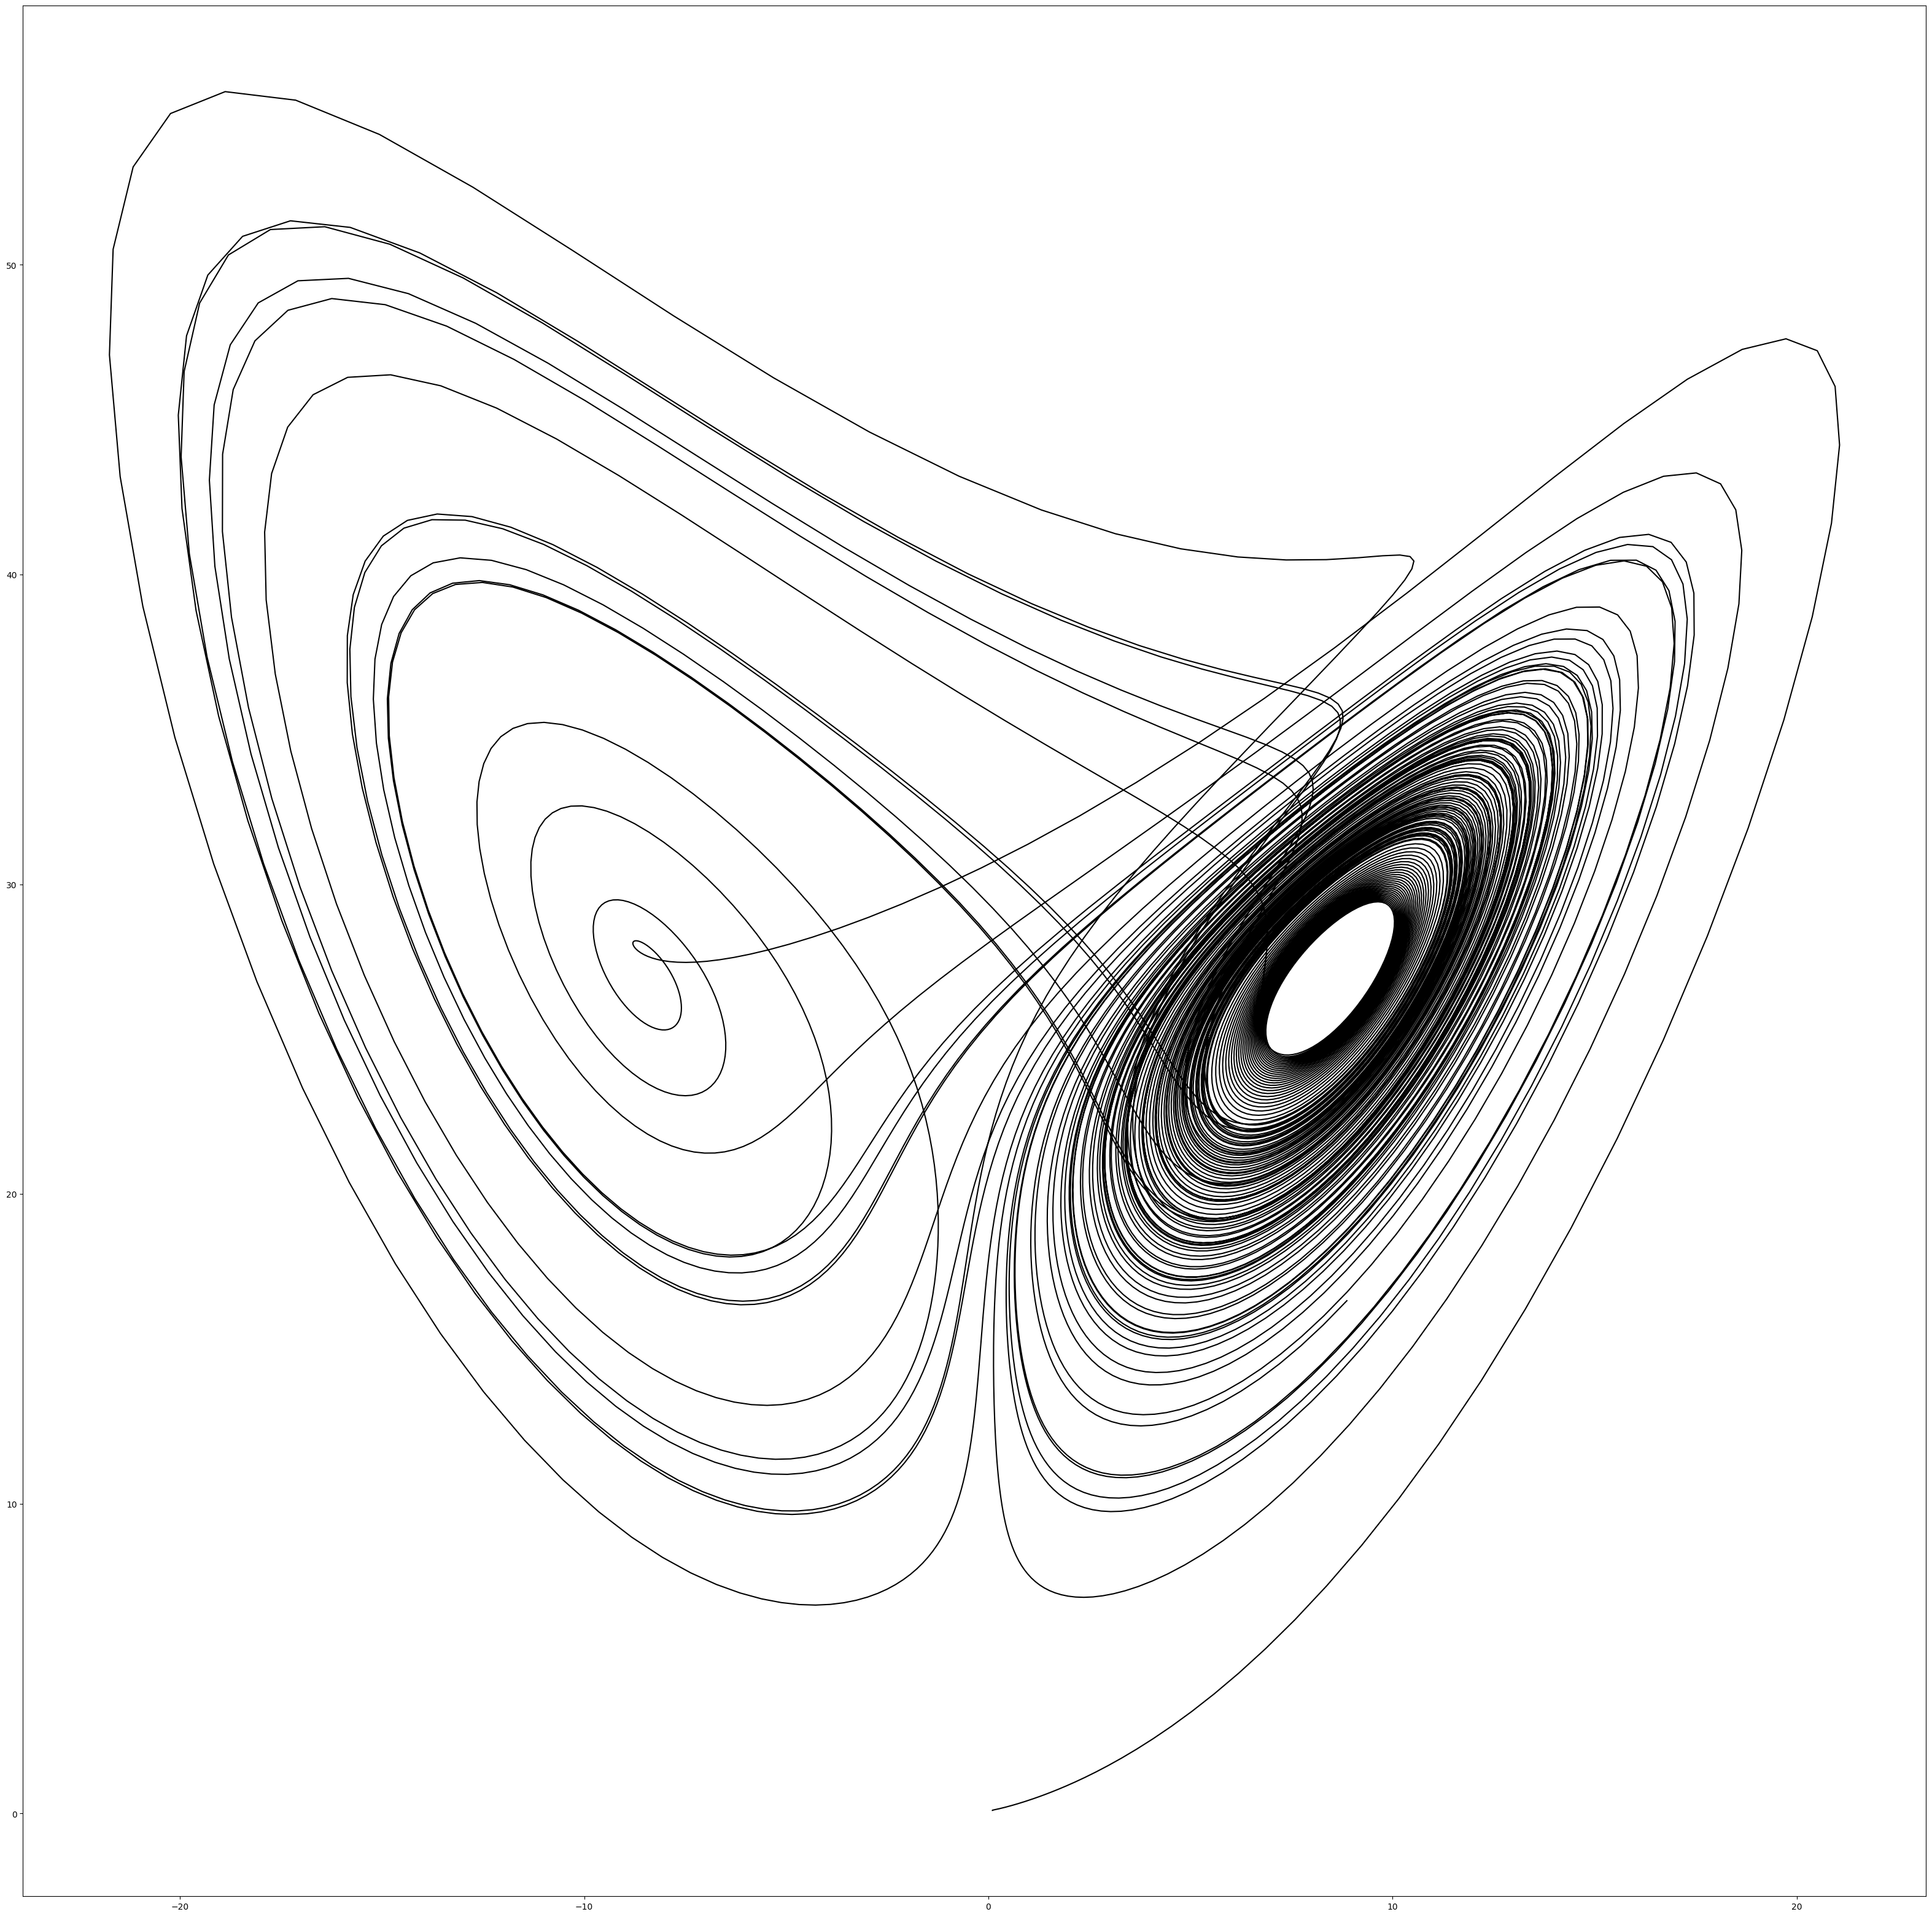

In [3]:
#1
N = 10000
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
t[0] = 0
x[0] = 0.1
y[0] = 0.1
z[0] = 0.1
h = 0.01
sig = 10
r = 28
b = 8/3
for i in range(1, len(t)):
    kx1 = h * sig * (y[i-1]-x[i-1])
    kx2 = h * sig * ((y[i-1]) - (x[i-1] + (kx1/2)))
    kx3 = h * sig * ((y[i-1]) - (x[i-1] + (kx2/2)))
    kx4 = h * sig * ((y[i-1]) - (x[i-1] + (kx3)))
    x[i] = x[i-1] + (1/6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

    ky1 = h * (r * x[i-1] - y[i-1] - x[i-1] * z[i-1])
    ky2 = h * (r * (x[i-1]) - (y[i-1] + (ky1/2)) - ((x[i-1]) * (z[i-1])))
    ky3 = h * (r * (x[i-1]) - (y[i-1] + (ky2/2)) - ((x[i-1]) * (z[i-1])))
    ky4 = h * (r * (x[i-1]) - (y[i-1] + (ky3)) - ((x[i-1]) * (z[i-1])))
    y[i] = y[i-1] + (1/6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

    kz1 = h * (x[i-1] * y[i-1] - b * z[i-1])
    kz2 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz1/2)))
    kz3 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz2/2)))
    kz4 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz3)))
    z[i] = z[i-1] + (1/6) * (kz1 + 2 * kz2 + 2 * kz3 + ky4)
    
    t[i] = t[i-1] + h
plt.figure(figsize= (10, 10))
plt.plot(t, x, label = "x(t)")
plt.plot(t, y, label = "y(t)")
plt.plot(t, z, label = "z(t)")
plt.legend()
plt.show()
plt.figure(figsize= (10, 10))
plt.plot(x, z, 'k')
plt.show()
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection = "3d")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot3D(x, y, z, color = 'k')
plt.show()

In [4]:
def Lorenz_Attractor(N, h, t0, x0, y0, z0, sig, r, b):
    t = np.zeros(N)
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    t[0] = t0
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(1, len(t)):
        kx1 = h * sig * (y[i-1]-x[i-1])
        kx2 = h * sig * ((y[i-1]) - (x[i-1] + (kx1/2)))
        kx3 = h * sig * ((y[i-1]) - (x[i-1] + (kx2/2)))
        kx4 = h * sig * ((y[i-1]) - (x[i-1] + (kx3)))
        x[i] = x[i-1] + (1/6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

        ky1 = h * (r * x[i-1] - y[i-1] - x[i-1] * z[i-1])
        ky2 = h * (r * (x[i-1]) - (y[i-1] + (ky1/2)) - ((x[i-1]) * (z[i-1])))
        ky3 = h * (r * (x[i-1]) - (y[i-1] + (ky2/2)) - ((x[i-1]) * (z[i-1])))
        ky4 = h * (r * (x[i-1]) - (y[i-1] + (ky3)) - ((x[i-1]) * (z[i-1])))
        y[i] = y[i-1] + (1/6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

        kz1 = h * (x[i-1] * y[i-1] - b * z[i-1])
        kz2 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz1/2)))
        kz3 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz2/2)))
        kz4 = h * ((x[i-1])*(y[i-1]) - b * (z[i-1] + (kz3)))
        z[i] = z[i-1] + (1/6) * (kz1 + 2 * kz2 + 2 * kz3 + ky4)
        
        t[i] = t[i-1] + h
    return t, x, y, z

In [159]:
#2
def F(x, y, z, r, b, sig):
    return np.array([[sig * (y-x)], [r*x - y - x * z], [x * y - b * z]])

def J(x, y, z, r, b, sig):
    j = np.zeros((3, 3))
    j[0, :] = np.array([-sig, sig, 0])
    j[1, :] = np.array([r - z, -1, -x])
    j[2, :] = np.array([y, x, -b])
    return j
    
def NewtonRaphson(x0, y0, z0, r, b, sig):
    x = np.array([x0, y0, z0])
    for i in range(100):
        xs = x[0]
        ys = x[1]
        zs = x[2] 
        f = F(xs, ys, zs, r, b, sig) 
        j = J(xs, ys, zs, r, b, sig)
        xs = np.linalg.solve(j, f)
        x = x - xs.flatten()
        i += 1
    return x

print(NewtonRaphson(1, 1, 1, 28, 8/3, 10))
print(NewtonRaphson(10,10,10, 28, 8/3,10))
print(NewtonRaphson(-10,-10,-10, 28, 8/3, 10))

[0. 0. 0.]


In [ ]:
r = np.linspace(0, 4, 200)
xs = []
ys = []
zs = []
rs = []
for i in range(len(r)):
    x1 = NewtonRaphson(0.1, 0.1, 0.1, r[i], 8/3, 10)
    x2 = NewtonRaphson(10, 10, 10, r[i], 8/3, 10)
    x3 = NewtonRaphson(-6, -6, -6, r[i], 8/3, 10)
    xs.extend([x1[0], x2[0], x3[0]])
    ys.extend([x1[1], x2[1], x3[1]])
    zs.extend([x1[2], x2[2], x3[2]])
    rs.extend([r[i]] * 3)
plt.scatter(rs, xs, c = 'k', marker= '.', s = 1)
plt.title("x as a function of r")
plt.xlabel("r")
plt.ylabel("x")
plt.show()
plt.scatter(rs, ys, c = 'k', marker= '.', s = 1)
plt.title("y as a function of r")
plt.xlabel("r")
plt.ylabel("y")
plt.show()
plt.scatter(rs, zs, c = 'k', marker= '.', s = 1)
plt.title("z as a function of r")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [6]:
def bi(b, r):
    x1 = np.sqrt(b * (r - 1))
    x2 = - np.sqrt(b * (r - 1))
    y1 = np.sqrt(b * (r - 1))
    y2 = - np.sqrt(b * (r - 1))
    z = r - 1
    return x1, x2, y1, y2, z

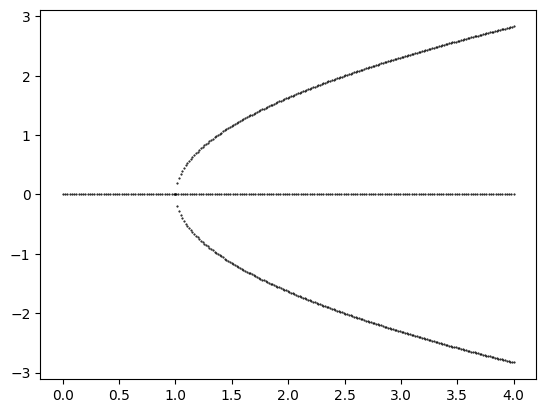

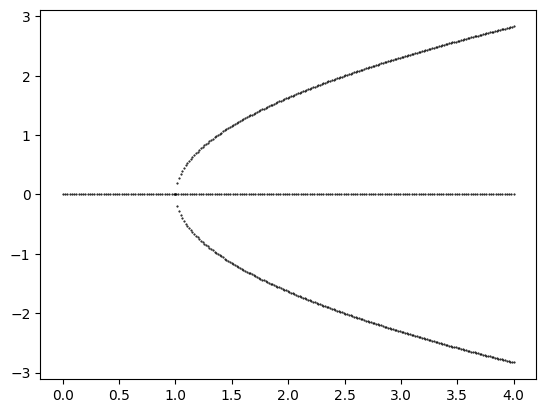

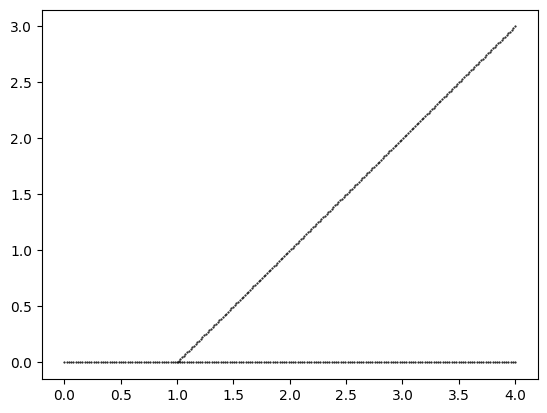

In [7]:
r = np.linspace(1, 4, 200)
xs = []
ys = []
zs = []
rs = []
for i in range(len(r)):
    x1, x2, y1, y2, z = bi(8/3, r[i])
    xs.extend([x1, x2])
    ys.extend([y1, y2])
    zs.extend([z])
    rs.extend([r[i], r[i]])
plt.scatter(np.linspace(0, 4, 200), np.zeros(200), c = 'k', marker = '.', s = 1)
plt.scatter(rs, xs, c = 'k', marker= '.', s = 1)
plt.show()
plt.scatter(np.linspace(0, 4, 200), np.zeros(200), c = 'k', marker = '.', s = 1)
plt.scatter(rs, ys, c = 'k', marker= '.', s = 1)
plt.show()
plt.scatter(np.linspace(0, 4, 200), np.zeros(200), c = 'k', marker = '.', s = 1)
plt.scatter(r, zs, c = 'k', marker= '.', s = 1)
plt.show()

In [161]:
x = NewtonRaphson(3, 3, 3, 2, 8/3, 10)
j = J(x[0], x[1], x[2], 2, 8/3, 10)
l = np.linalg.eigvals(j)
print(l)

[-11.24223995+0.j          -1.21221336+1.80957228j
  -1.21221336-1.80957228j]


In [163]:
def stability(x, r, b, sig):
    j = J(x[0], x[1], x[2], r, b, sig)
    l = np.linalg.eigvals(j)
    print(l)
    if np.any(np.iscomplex(l)):
        print("Complex Eigenvalues: Center Oscillatory Point")
    elif np.all(np.real(l) > 0):
        print("Positive Real Eigenvalues: Unstable Point")
    elif np.all(np.real(l) < 0):
        print("Negative Real Eigenvalues: Stable Point")
    else:
        print("Mixed Real Eigenvalues: Saddle Point")

In [164]:
x = NewtonRaphson(0.1, 0.1, 0.1, 2, 8/3, 10)
print(x)
stability(x, 2, 8/3, 10)
print()

x = NewtonRaphson(10, 10, 10, 2, 8/3, 10)
print(x)
stability(x, 2, 8/3, 10)
print()

x = NewtonRaphson(-6, -6, -6, 2, 8/3, 10)
print(x)
stability(x, 2, 8/3, 10)

[-11.84428877   0.84428877  -2.66666667]
Mixed Real Eigenvalues: Saddle Point


In [169]:
#3
x10 = np.array([0.5, 0.6, 0.7])
x20 = np.array([0.6, 0.7, 0.8])
d0 = np.sqrt(np.sum((x10 - x20) ** 2))
t1, x1, y1, z1 = Lorenz_Attractor(N = 10000, h = 0.01, x0 = x10[0], y0 = x10[1], z0 = x10[2], t0 = 0, sig = 10, r = 28, b = 8/3)
t2, x2, y2, z2 = Lorenz_Attractor(N = 10000, h = 0.01, x0 = x20[0], y0 = x20[1], z0 = x20[2], t0 = 0, sig = 10, r = 28, b = 8/3)

x11 = np.array([x1[9999], y1[9999], z1[9999]])
x22 = np.array([x2[9999], y2[9999], z2[9999]])
dt = np.sqrt(np.sum((x11 - x22) ** 2))
print(d0, dt)

lam = (1/t[9999]) * np.log(dt/d0)
print(f"For x10 = {x10} and x20 = {x20}: Lambda is {lam}")

print()

l2x10 = np.sqrt(np.sum(x10 ** 2))
l2x11 = np.sqrt(np.sum(x11 ** 2))
print(l2x10, l2x11)
lam = (1/t[9999]) * np.log(l2x11/l2x10)
print(f"For x10 = {x10}: Lambda is {lam}")

0.17320508075688776 21.491316878379518
For x10 = [0.5 0.6 0.7] and x20 = [0.6 0.7 0.8]: Lambda is 0.4821410077103598

1.0488088481701514 29.946099460071842
For x10 = [0.5 0.6 0.7]: Lambda is 0.33520791990418813


In [ ]:
def liapunov_exponent(x10, x20):
    d0 = np.sqrt(np.sum((x10 - x20) ** 2))
    t1, x1, y1, z1 = Lorenz_Attractor(N = 10000, h = 0.01, x0 = x10[0], y0 = x10[1], z0 = x10[2], t0 = 0, sig = 10, r = 28, b = 8/3)
    t2, x2, y2, z2 = Lorenz_Attractor(N = 10000, h = 0.01, x0 = x20[0], y0 = x20[1], z0 = x20[2], t0 = 0, sig = 10, r = 28, b = 8/3)

    x11 = np.array([x1[9999], y1[9999], z1[9999]])
    x22 = np.array([x2[9999], y2[9999], z2[9999]])
    dt = np.sqrt(np.sum((x11 - x22) ** 2))

    lam = (1/t[9999]) * np.log(dt/d0)
    
    return lam

x10 = np.array([0.5, 0.6, 0.7])
x20 = np.array([0.6, 0.7, 0.8])
lam = liapunov_exponent(x10, x20)
print(f"For x10 = {x10} and x20 = {x20}: Lambda is {lam}")

In [178]:
#4
def derivative(z):
    dz = np.zeros(len(z))
    for i in range(1, len(z) - 1):
        h = np.abs(z[i+1] - z[i])
        dz[i] = (z[i+1]-z[i-1])/2*h
    h = np.abs(z[1] - z[0])
    dz[0] =  (z[i+1] - z[i])/h
    h = np.abs(z[-2] - z[-1])
    dz[-1] = (z[-2] - z[-1])/h 
    return dz

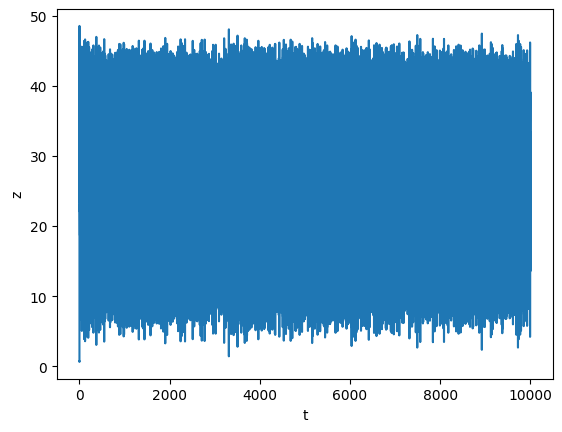

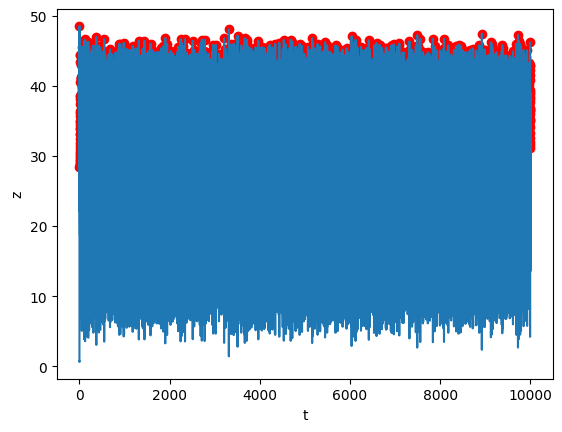

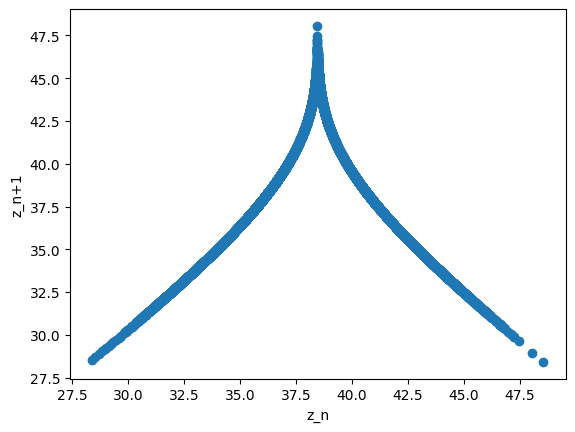

The limit cycle is unstable


In [181]:
x0 = np.array([0.5, 0.6, 0.7])
t, x, y, z = Lorenz_Attractor(N = 10000000, h = 0.001, x0 = x0[0], y0 = x0[1], z0 = x0[2], t0 = 0, sig = 10, r = 28, b = 8/3)
plt.plot(t, z)
plt.xlabel("t")
plt.ylabel("z")
plt.show()
indices = []
max_z = []
max_t = []
for i in range(1, len(x) - 1):
    if z[i] > z[i-1] and z[i] > z[i+1]:
        indices.append(i)
        max_z.append(z[i])
        max_t.append(t[i])
plt.plot(t, z)
plt.xlabel("t")
plt.ylabel("z")
plt.scatter(max_t, max_z, color = 'r')
plt.show()
plt.scatter(max_z[:-1], max_z[1:])
plt.xlabel("z_n")
plt.ylabel("z_n+1")
plt.show()



In [6]:
x0 = np.array([0.5, 0.6, 0.7])
t, x, y, z = Lorenz_Attractor(N = 100000, h = 0.001, x0 = x0[0], y0 = x0[1], z0 = x0[2], t0 = 0, sig = 10, r = 28, b = 8/3)
dz = np.gradient(z)
dzs = np.sqrt(np.sum(dz ** 2))
if dzs > 1:
    print("The limit cycle is unstable")
elif dzs < 1:
    print("The limit cycle is stable")

The limit cycle is unstable
